#**Movie Genre Classification using TF-IDF and Naive Bayes**

Aim is to build a machine learning model to predict the genre of a movie based on its plot summary or textual information.

To achieve this, we will leverage natural language processing (NLP) techniques, specifically TF-IDF (Term Frequency-Inverse Document Frequency), in conjunction with the Naive Bayes classification algorithm.

The primary goal is to create a model that can automatically assign one or more genres to a movie based on the textual description provided. This can be valuable for categorizing and organizing movies in databases, recommendation systems, and content filtering.

# Natural Language Processing (NLP)

Natural Language Processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. The ultimate goal of NLP is to enable computers to understand, interpret, and generate human language in a way that is both meaningful and useful. NLP techniques are used for a variety of tasks such as language translation, sentiment analysis, speech recognition, and more.

##TF-IDF (Term Frequency-Inverse Document Frequency)


TF-IDF is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus). It is widely used in text mining and information retrieval to transform textual data into numerical vectors, which can then be used by machine learning algorithms.

Components of TF-IDF

1. Term Frequency (TF): This measures how frequently a term appears in a document. The assumption is that the more frequently a term appears in a document, the more important it is.
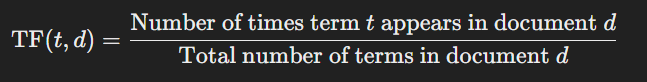

2. Inverse Document Frequency (IDF): This measures how important a term is. While computing TF, all terms are considered equally important. But in reality, some terms (like "is", "the", "of") may appear a lot in multiple documents but carry little unique information. IDF helps to weigh down the frequent terms while scaling up the rare ones.
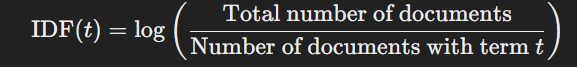

3. TF-IDF Score: The TF-IDF score is the product of TF and IDF.


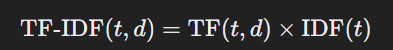

## Naive Bayes Classification Algorithm

Naive Bayes is a probabilistic classification algorithm based on Bayes' Theorem. It is particularly suited for text classification problems because it handles high-dimensional data well and is computationally efficient.

Bayes' Theorem


Bayes' Theorem calculates the probability of a hypothesis (e.g., a document belonging to a certain class) based on prior knowledge of conditions that might be related to the hypothesis.


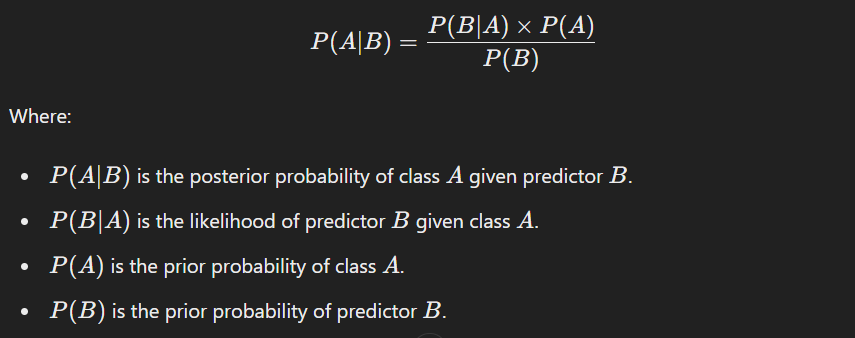


## Applying Naive Bayes to Text Classification
In the context of text classification, we want to calculate the probability of a document
𝑑
d belonging to a class
𝑐
c.

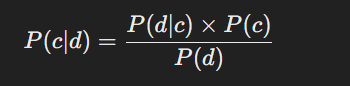

Naive Bayes assumes that the presence (or absence) of a particular feature (word) in a class is independent of the presence (or absence) of any other feature (word). This is known as the "naive" assumption.

𝑃
(
𝑑
∣
𝑐
)
=
𝑃
(
𝑤
1
,
𝑤
2
,
.
.
.
,
𝑤
𝑛
∣
𝑐
)
≈
𝑃
(
𝑤
1
∣
𝑐
)
×
𝑃
(
𝑤
2
∣
𝑐
)
×
.
.
.
×
𝑃
(
𝑤
𝑛
∣
𝑐
)

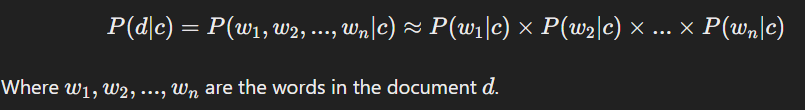

## Using TF-IDF with Naive Bayes
TF-IDF can be used to transform textual data into a numerical format that can be used by the Naive Bayes classifier. Here's how it works:

1. Transform Text Data with TF-IDF: Convert the text data into TF-IDF vectors. Each document is represented as a vector of TF-IDF scores for each term in the corpus.

2. Train Naive Bayes Classifier: Use the TF-IDF vectors to train a Naive Bayes classifier. The classifier learns the probabilities of each class given the TF-IDF scores of the terms.

3. Classify New Text: For new, unseen text, transform it into a TF-IDF vector and use the trained Naive Bayes classifier to predict the class.

##Example Code
Here's an example of how TF-IDF and Naive Bayes can be combined in Python:

In this example, we preprocess the text, transform it into TF-IDF vectors, and train a Naive Bayes classifier to predict movie genres. The pipeline simplifies the process of combining TF-IDF transformation and classification.








In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Example data
train_plots = ["A story of a boy and his dog", "A tale of love and loss", "An adventure in space"]
train_genres = ["Drama", "Romance", "Sci-Fi"]

test_plots = ["A love story in the stars", "A boy's journey"]
test_genres = ["Romance", "Drama"]

# Create DataFrame
train_df = pd.DataFrame({'plot': train_plots, 'genre': train_genres})
test_df = pd.DataFrame({'plot': test_plots, 'genre': test_genres})

# Preprocessing function
import re
import string

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
    text = re.sub('\s+', ' ', text).strip()  # Remove extra spaces
    return text

train_df['plot'] = train_df['plot'].apply(preprocess_text)
test_df['plot'] = test_df['plot'].apply(preprocess_text)

# Extract features and labels
X_train = train_df['plot']
y_train = train_df['genre']

X_test = test_df['plot']
y_test = test_df['genre']

# Create and train the model using a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
print("Classification Report")
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))


Classification Report
              precision    recall  f1-score   support

       Drama       1.00      1.00      1.00         1
     Romance       0.00      0.00      0.00         1
      Sci-Fi       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2

Accuracy:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

[**Dataset Link -  Genre Classification Dataset IMDb** ](https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb)

In [3]:
# Importing Libraries
import pandas as pd # for data structures and data analysis tools for handling structured data.
import matplotlib.pyplot as plt #plotting library for creating static, animated, and interactive visualizations
import seaborn as sns #statistical data visualization library based on Matplotlib, used for creating informative and attractive graphics.
import re #regular expression matching operations for text processing.
import nltk #The Natural Language Toolkit, used for working with human language data (text).
import string #Contains string constants and classes for common string operations.
from nltk.corpus import stopwords #a set of commonly used stopwords in various languages for text preprocessing.
from nltk.stem import LancasterStemmer #A tool for reducing words to their root form (stemming).
from sklearn.feature_extraction.text import TfidfVectorizer #Converts a collection of raw documents to a matrix of TF-IDF features.
from sklearn.model_selection import train_test_split #Splits arrays or matrices into random train and test subsets.
from sklearn.naive_bayes import MultinomialNB #Implements the Naive Bayes classifier for multinomially distributed data.
from sklearn.metrics import accuracy_score, classification_report #Provides functions to measure classification performance.

In [5]:
#Load Dataset
train_path = "train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [6]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
train_data.shape

(54214, 3)

In [8]:
print(train_data.describe())

                                 Title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [9]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [10]:
#checking for null values
print(train_data.isnull().sum())

Title          0
Genre          0
Description    0
dtype: int64


In [11]:
# Load the test data
test_path = "test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


EDA & Visualization

<ipython-input-12-bca75ad896ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')


Text(0, 0.5, 'Genre')

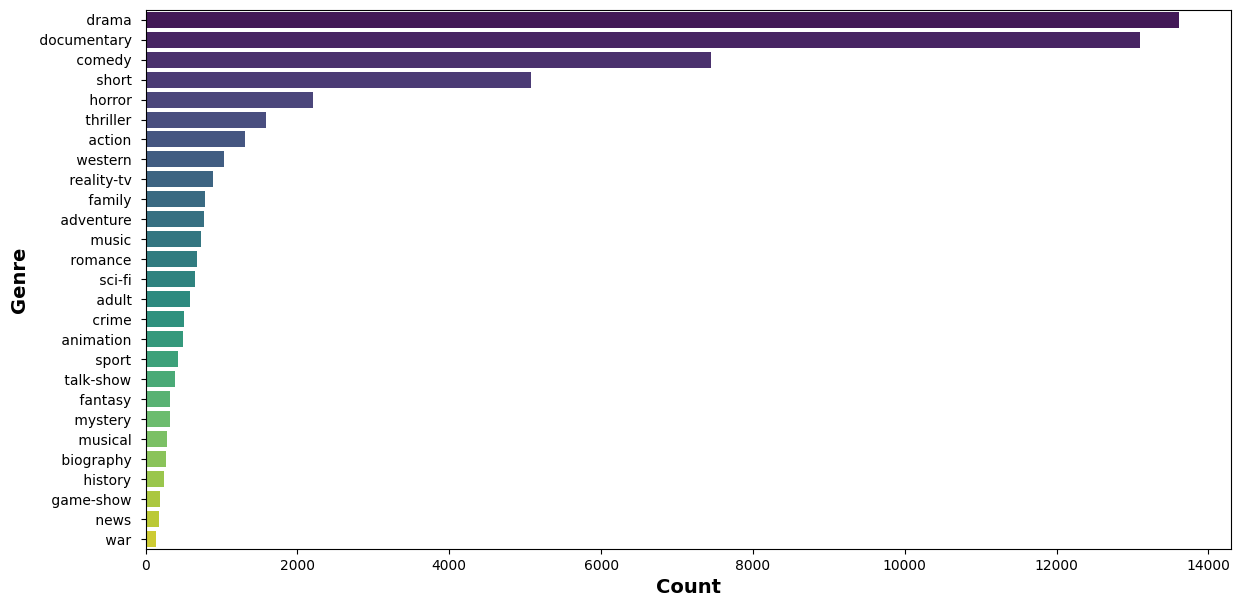

In [12]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

<ipython-input-13-8f22f822c653>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='viridis')


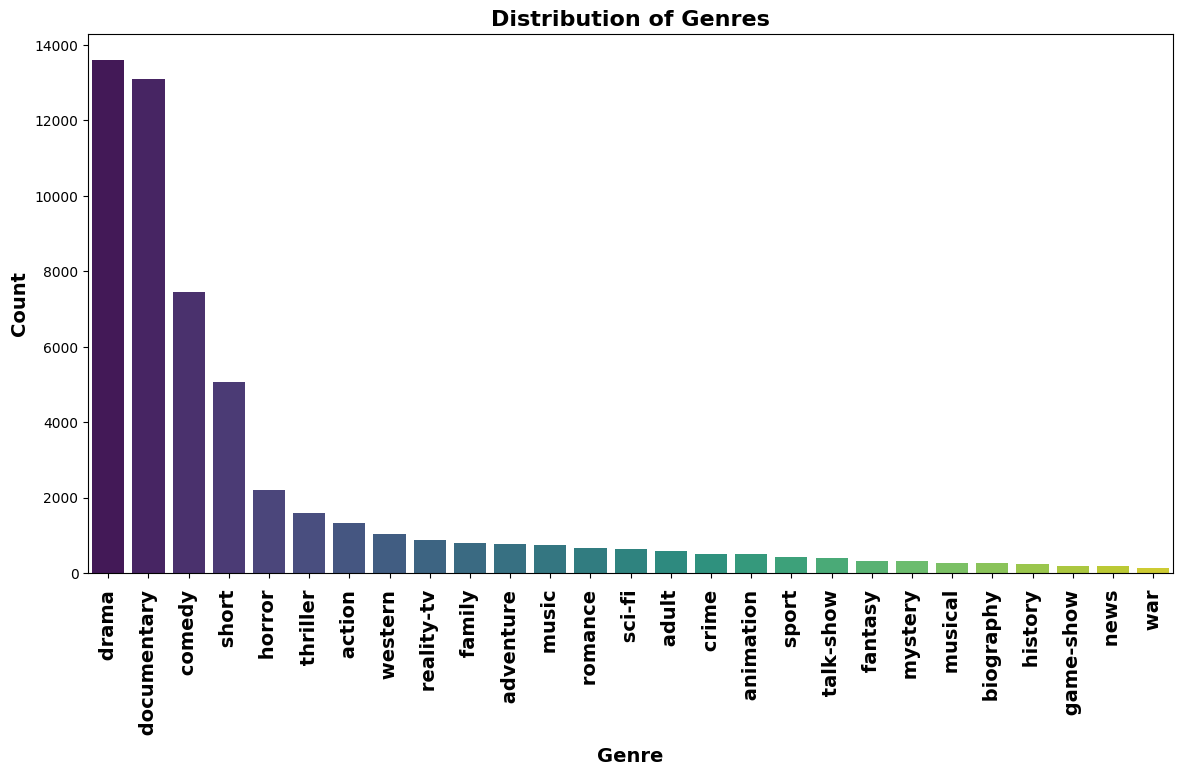

In [13]:
# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

Data Preprocessing and Text Cleaning

In [25]:
# Initialize the stemmer and stop words
nltk.download('stopwords')
nltk.download('punkt')

stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [26]:
# Calculate the length of cleaned text
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)

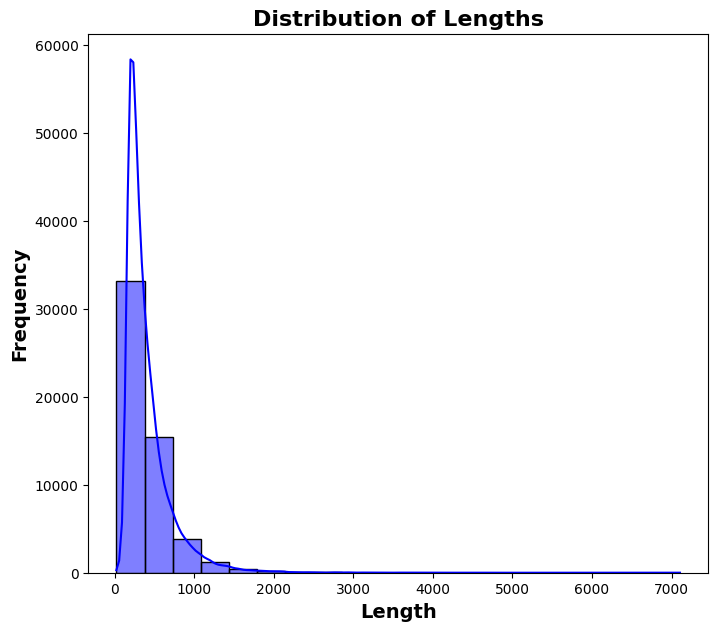

In [27]:
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

Text Vectorization Using TF-IDF

In [28]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

Split Data and Train a Model (Naive Bayes)

In [29]:
# Split the data into training and validation sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.44526422576777647
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Make Predictions on the Test Data

In [30]:
# Use the trained model to make predictions on the test data
X_test_predictions = classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [31]:


# Save the test_data DataFrame with predicted genres to a CSV file
test_data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_data)

          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    